# 讀入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, concatenate
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics
from tensorflow.keras import losses
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

C:\pyth\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\pyth\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\pyth\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\pyth\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a

# 讀入整理套件

In [2]:
(X_train, y_train0), (X_test, y_test0) = datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

# 抽樣函數

In [3]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# VAE 的建立

In [4]:
enc_1 = Dense(400, activation='relu')
enc_2 = Dense(200, activation='relu')
enc_3 = Dense(100, activation='relu')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_1 = Dense(100, activation='relu')
dec_2 = Dense(200, activation='relu')
dec_3 = Dense(400, activation='relu')
dec_4 = Dense(784, activation='sigmoid')

In [5]:
x = Input(shape=(784,))
enc_x = enc_3(enc_2(enc_1(x)))

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [7]:
x_hat = dec_4(dec_3(dec_2(dec_1(z))))

In [8]:
VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 400)          314000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          80200       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          20100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [9]:
reconstruction_loss = 784 * losses.binary_crossentropy(x, x_hat)

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

VAE.add_loss(vae_loss)

In [10]:
VAE.compile(optimizer=Adam())

# 模型訓練

In [11]:
VAE.fit(X_train, batch_size=80, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 183.1930
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 159.9545
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 153.7422
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 150.5978
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 148.2897
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 147.0210
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 145.8776
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 144.8872
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 143.5377
Epoch 10/10
60000/60000 [==============================] - 5s 76us/sample - loss: 143.4253


In [13]:
VAE.fit(X_train, batch_size = 300, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 2s 36us/sample - loss: 140.6293
Epoch 2/20
60000/60000 [==============================] - 2s 27us/sample - loss: 139.9094
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 139.5188
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 139.4360
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 139.5407
Epoch 6/20
60000/60000 [==============================] - 2s 28us/sample - loss: 139.0520
Epoch 7/20
60000/60000 [==============================] - 2s 28us/sample - loss: 139.0236
Epoch 8/20
60000/60000 [==============================] - 2s 28us/sample - loss: 138.9512
Epoch 9/20
60000/60000 [==============================] - 2s 28us/sample - loss: 138.9036
Epoch 10/20
60000/60000 [==============================] - 2s 29us/sample - loss: 138.8792
Epoch 11/20
60000/60000 [==============================] - 2s 29us/sample - loss: 138.4388
Epoch 12

In [14]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 414,502
Trainable params: 414,502
Non-trainable params: 0
_________________________________________________________________


# Encoder 的視覺化

In [15]:
z_input = Input(shape=(2,))
VAE_Decoder = Model(z_input, dec_4(dec_3(dec_2(dec_1(z_input)))))
VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               314384    
Total params: 415,284
Trainable params: 415,284
Non-trainable params: 0
_________________________________________________________________


In [16]:
indices = np.random.randint(X_train.shape[0], size=3000)

In [17]:
VAE_latents = VAE_Encoder.predict(X_train[indices])

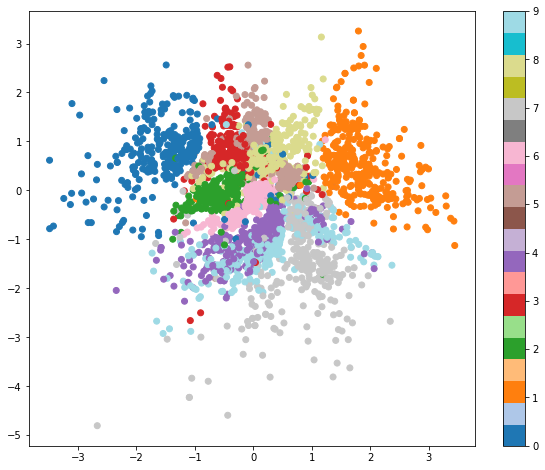

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_train0[indices], cmap='tab20')
plt.colorbar()
plt.show()

# Decoder 的視覺化

In [19]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [20]:
n=30
digit_size = 28

In [21]:
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

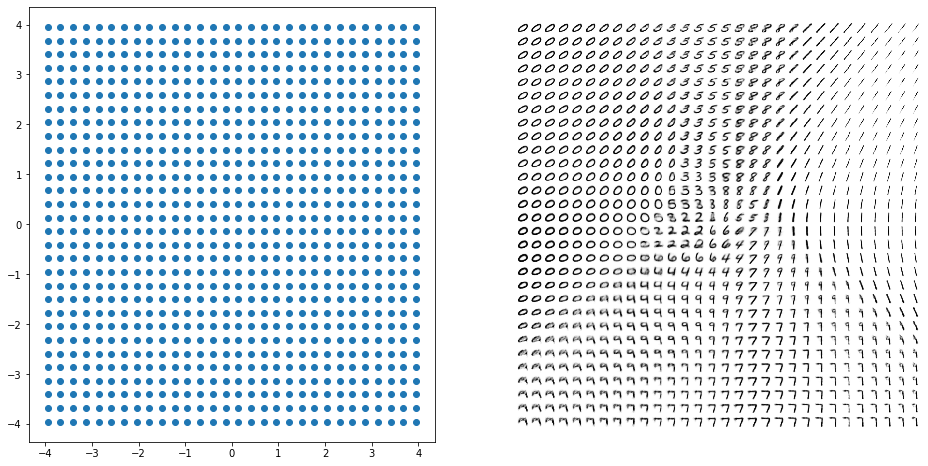

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
XXX, YYY = np.meshgrid(grid_x_vae, grid_y_vae)
plt.scatter(XXX, YYY)

plt.subplot(1, 2, 2)
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

# 比較

In [23]:
idx_1, idx_2 = np.random.randint(X_train.shape[0], size=2)

In [24]:
def inBetween(t):
    data_0 = X_train[idx_1].reshape(28, 28)
    data_1 = X_train[idx_2].reshape(28, 28)
    data_t = (1-t)*data_0 + t*data_1
    
    mu_0 = VAE_Encoder.predict(X_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(X_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.scatter(mu_t[0], mu_t[1])

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')
    ax2.set_title('t=0')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')
    ax3.set_title(f't={t}')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')
    ax4.set_title('t=1')

In [25]:
interact(inBetween, t=FloatSlider(value=0, 
                                  min=0, 
                                  max=1.0,
                                  step=0.02,))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.02), Output()), _dom_classes=('w…

<function __main__.inBetween(t)>